<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_ANS/blob/main/ANS_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.
Comenzamos importando las librerías necesarias para realizar todos los procesos relacionados con el modelo de predicción.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Preprocesamiento y elección de variables relevantes para el estudio.

## Importacion de los datos del dataset.
Descargar el archivo pertinente y lo importamos para comenzar con su análisis y preprocesamiento.


In [ ]:
df = pd.read_csv('Mall_Customers.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.
Analizando las primeras y últimas filas del dataframe, observamos que hay variables numericas y una variable que puede ser transformada para facilitar su procesamiento, ademas de una variable ID que podemos eliminar ya que no es relevante.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## Modificaciones de los datos.
Eliminamos la varible ID y transformamos los valores de la variable Gender.

In [ ]:
le = LabelEncoder()
df = df.drop('CustomerID', axis=1)
df['Gender'] = le.fit_transform(df.Gender.values)

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


## Mostrar parámetros estadísticos de los datos.
Mostramos los parámetros estadísticos de los datos para analizarlos y comprender mejor estos.

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


## Comprobar la existencia de datos nulos
Comprobamos la existencia de nulos para estudiar si es necesario rellenar esos datos.

In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Mostramos un histograma
Hacemos un estudio del histograma de los datos para ver como están repartidos y seleccionar los datos mas interesantes para hacer la división de cluster.

<ipython-input-30-41f6ce8af5f0>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

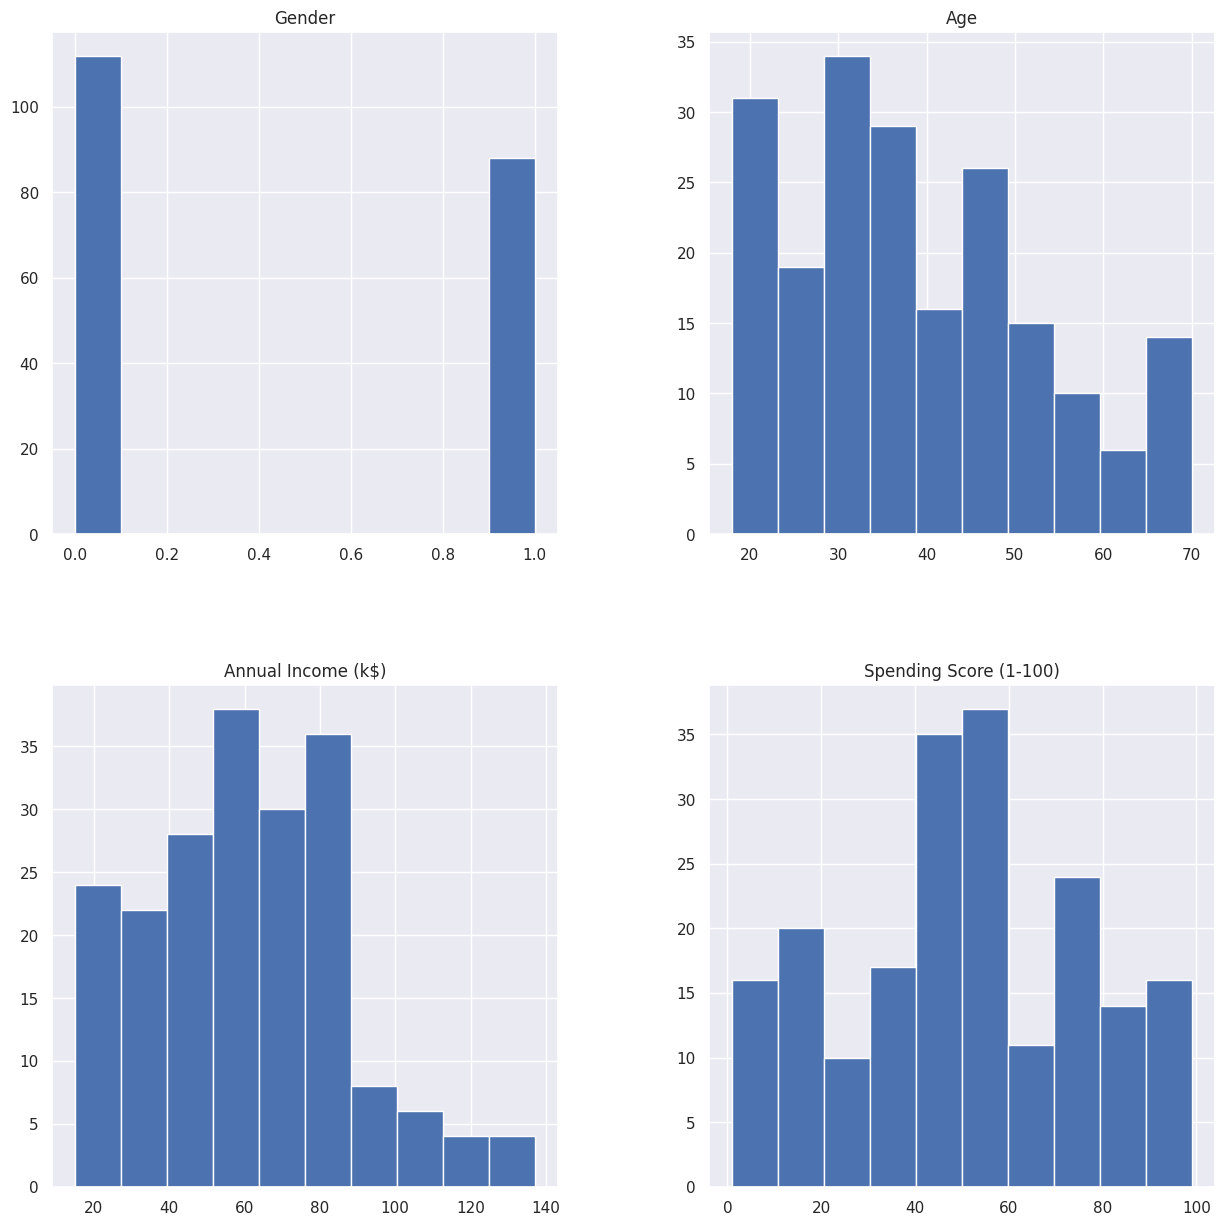

In [ ]:
df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())

## Estudiamos la relacion cruzada.
En este caso también estudiamos la relación cruzada de los valores respecto al género de los clientes para ver gráficamente qué diferencia existe entre hombres y mujeres.

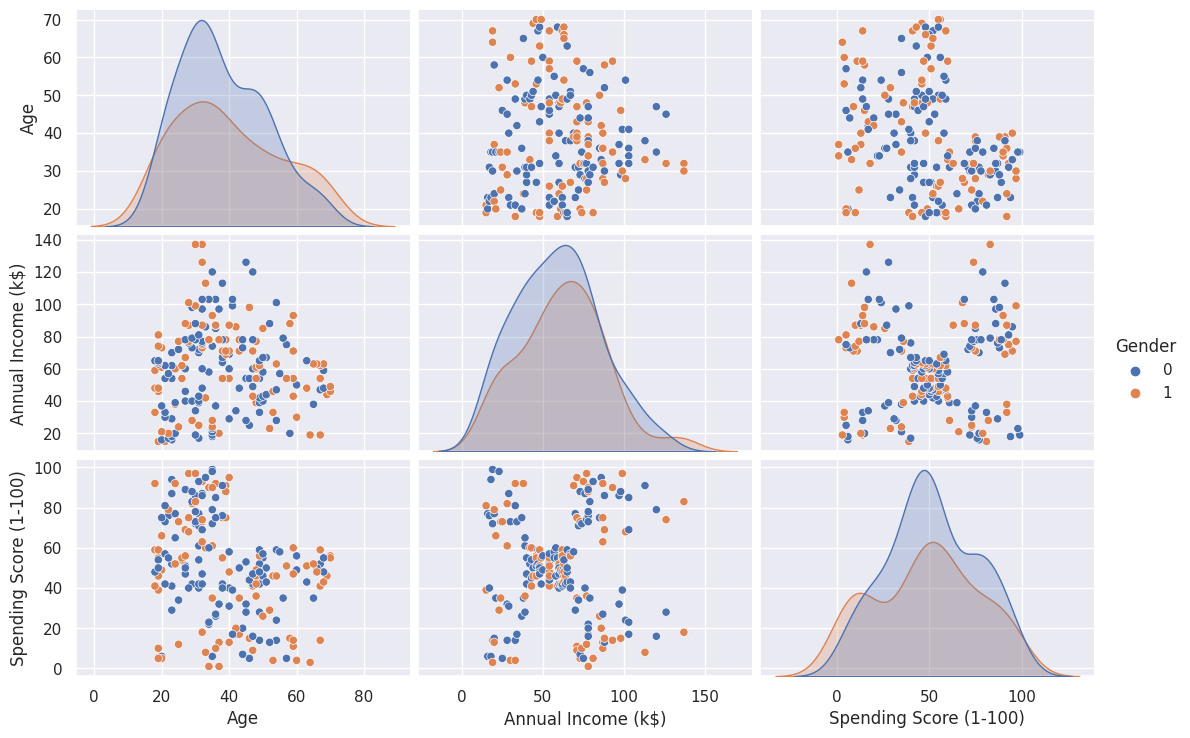

In [ ]:
sns.pairplot(df, hue='Gender', aspect = 1.5)
plt.show()

## Elección de variables relevantes
Habiendo realizado el estudio estadístico anterior, en este caso realizaremos el estudio con con todas las variables exceptuando el género debido a que existen una baja cantidad de variables en este dataframe y el género no debería de afectar a la hora de clasificar un cliente.

In [ ]:
variables_relevantes = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']

# Escalamiento y detección de outliers.

## Escalamiento.


### Estudio de las escalas.
Aqui usamos la funcion boxplot para ver la escala de los datos y visualizar de forma rapida si es necesario escalarlos.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:#474646'` for same effect.
  warnings.warn(msg, FutureWarning)


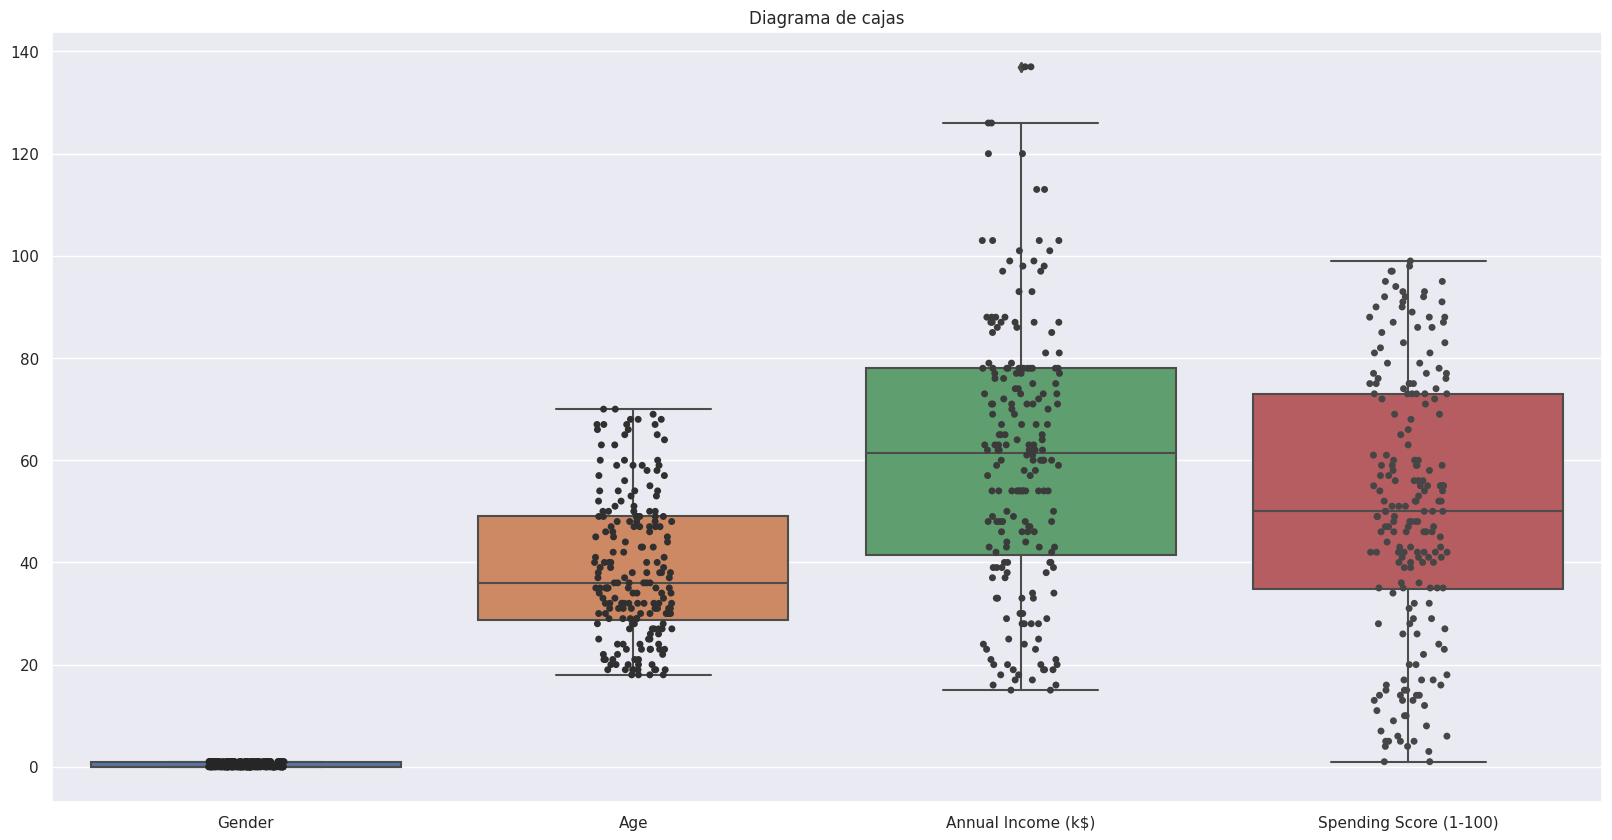

In [ ]:
sns.boxplot(df)
sns.stripplot(df, color = '#474646')
plt.title('Diagrama de cajas')
plt.show()

### Estudio de correlación.
En este caso vemos si existe una correlacion excesivamente alta entre alguno de los datos para escalar alguno de ellos para evitar sobre entrenamiento.

<Axes: >

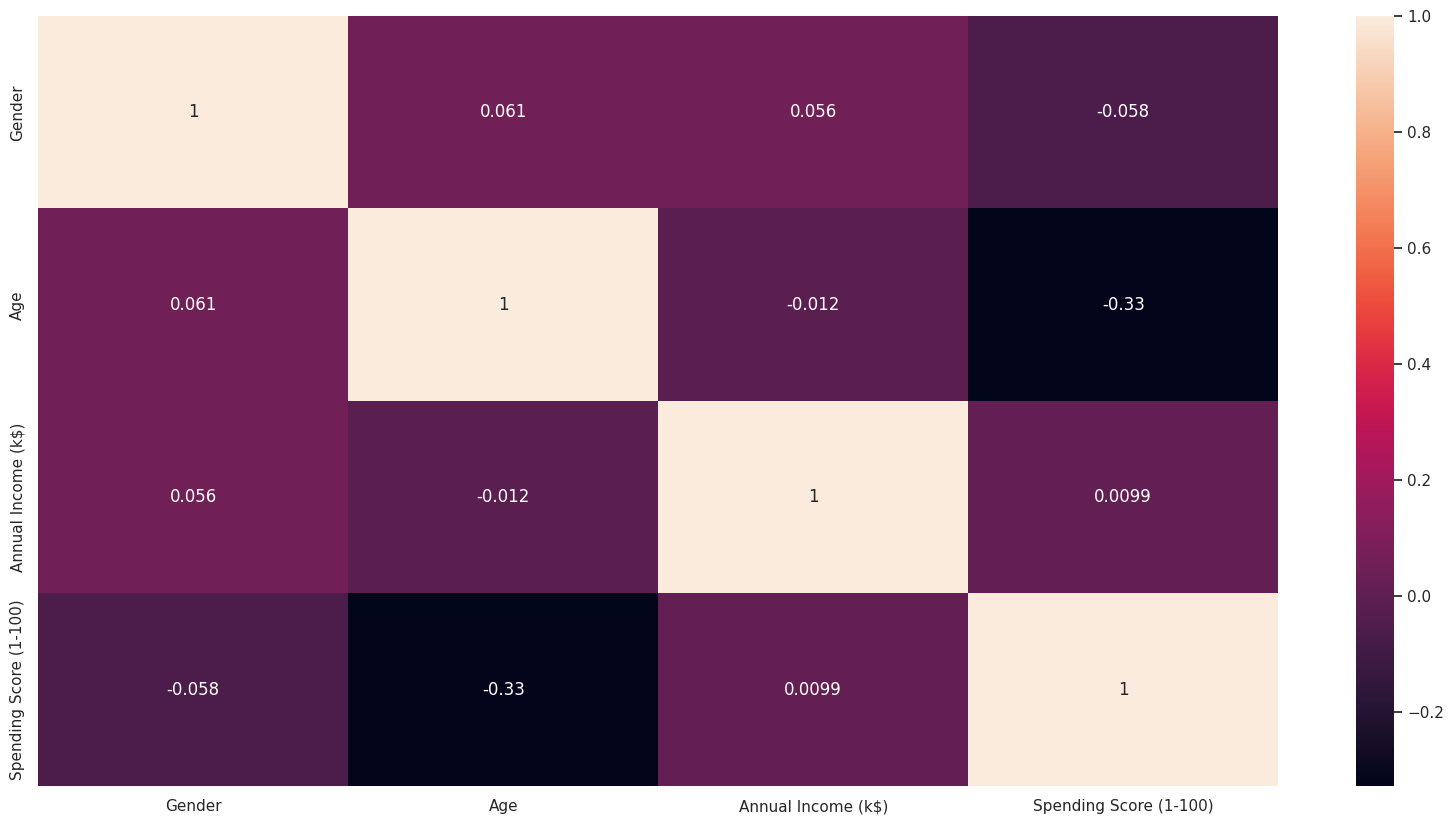

In [ ]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(df.corr(), annot=True)

### Escalamiento de datos.
En este caso no es necesario escalar los datos de este dataframe.

## Detectar los outliers y eliminarlos.

### Jacknife

In [ ]:
X = df.to_numpy()
SSE = []
K = 4

In [ ]:
for i in range(0, X.shape[0]):
  df_np = np.delete(X, i, axis = 0)
  kmeans = KMeans(n_clusters = K, n_init = 10, random_state = 100).fit(df_np)
  SSE.append(kmeans.inertia_)

In [ ]:
sigma = np.std(SSE)
mu = np.mean(SSE)

umbral = 2

outliers = []
for i in range(0, X.shape[0]):
  if np.abs(SSE[i] - mu) > umbral * sigma:
    outliers.append(i)

print(outliers)

[2, 6, 8, 10, 12, 14, 22, 30, 32, 196, 197, 198, 199]


In [ ]:
df = df.drop(outliers)

# Determinar el valor de k (número de grupos)

## Optimizando la función BIC

In [ ]:
def BIC(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return k, gmm.bic(X)

In [ ]:
bic_score = pd.DataFrame([BIC(k, df[variables_relevantes]) for k in range(2, 15)], columns=['k', 'BIC'])

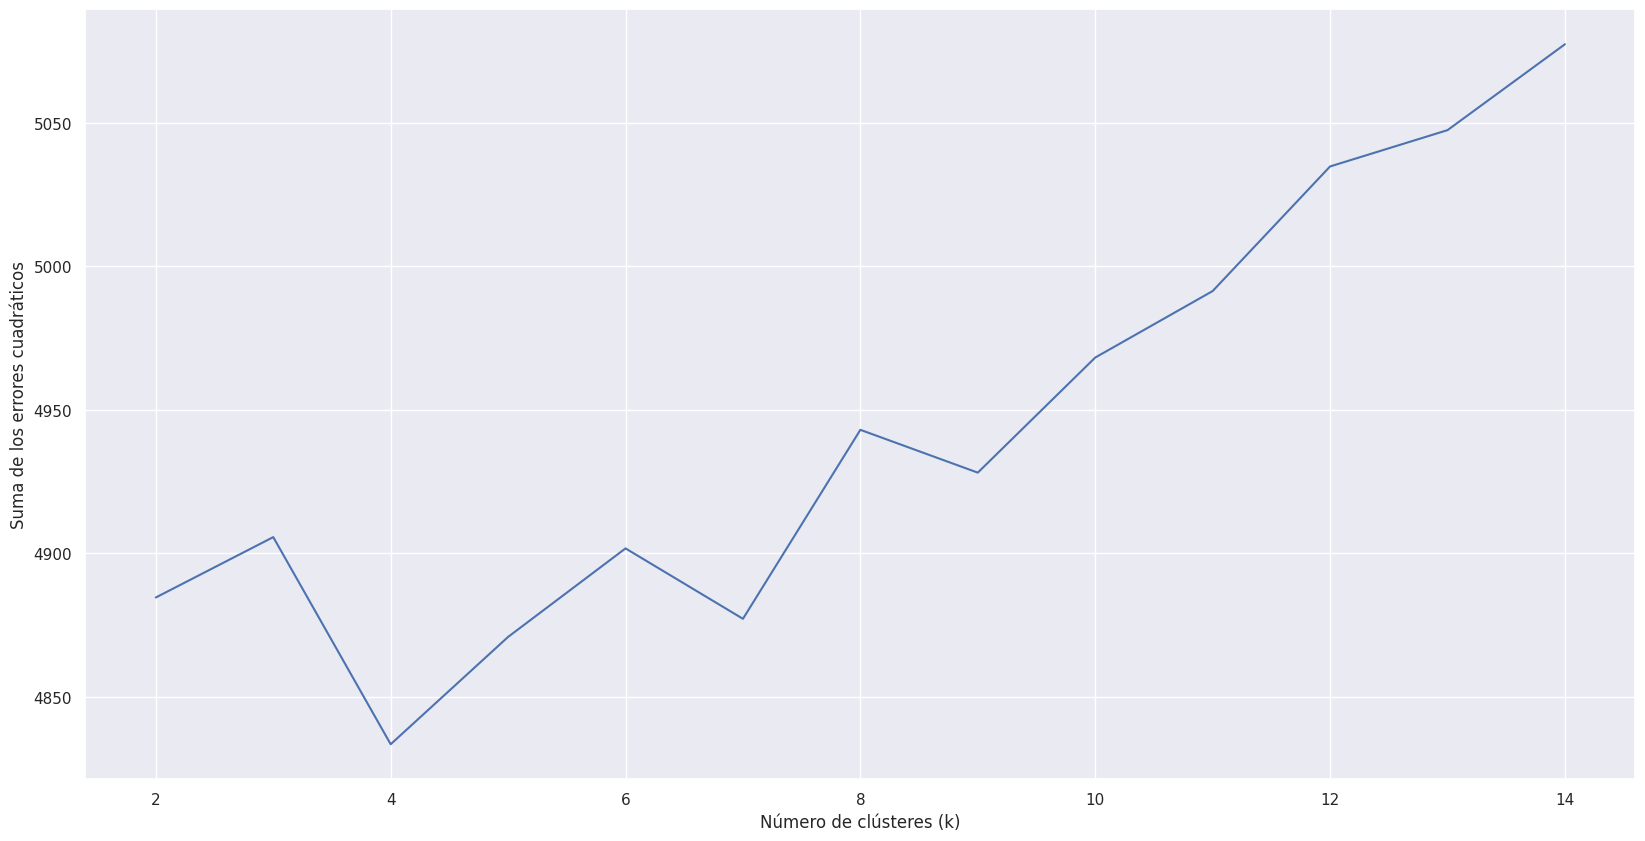

In [ ]:
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(bic_score['k'],bic_score['BIC'])

In [ ]:
k_optimized = bic_score[bic_score.BIC == bic_score.BIC.min()]
k_optimized

,k,BIC
2,4,4833.509193


In [ ]:
k = k_optimized['k'].values[0]

# Ejecución de análisis con los datos calculados (k y n_init)

In [ ]:
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
kmeans.fit(df[variables_relevantes])
labels = kmeans.labels_
pred = kmeans.predict(df[variables_relevantes])
centroides = kmeans.cluster_centers_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
centroides

array([[24.75      , 27.82142857, 73.53571429],
       [40.5       , 84.52777778, 18.38888889],
       [32.78378378, 84.10810811, 82.32432432],
       [44.5       , 51.76744186, 46.51162791]])

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
df['label'] =  labels
fig = px.scatter_3d(df, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',
              color='label')
fig.show()

# Mostrar para el análisis anterior una tabla.

In [ ]:
group = df.groupby(['label']).count() 

In [ ]:
result = []

for idx, x in enumerate(centroides):
    # print(x)
    row = [
        idx, 
        group.loc[[idx]]['Age'].values[0],
        x[0],
        x[1],
        x[2]
    ]
    result.append(row)
result = pd.DataFrame(result,columns=['grupo', 'values','center_age','center_annual_income','center_score'])
result

,grupo,values,center_age,center_annual_income,center_score
0,0,28,24.750000,27.821429,73.535714
1,1,36,40.500000,84.527778,18.388889
2,2,37,32.783784,84.108108,82.324324
3,3,86,44.500000,51.767442,46.511628


# Realiza una descripción semántica de los grupos

In [ ]:
df[df['label'] == 0].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
count,28.000000,28.000000,28.000000,28.000000,28.0
mean,0.464286,24.750000,27.821429,73.535714,0.0
std,0.507875,5.474689,10.274216,15.281269,0.0
min,0.000000,18.000000,15.000000,39.000000,0.0
25%,0.000000,20.750000,19.000000,64.000000,0.0
50%,0.000000,23.000000,26.500000,74.000000,0.0
75%,1.000000,30.000000,34.750000,81.250000,0.0
max,1.000000,35.000000,48.000000,99.000000,0.0


El grupo 0 está compuesto por 28 clientes.

Tienen un score entre 39-99 y una media de 73,5.

Su salario anual se estima en una media de 27K y está entre 15K y 48K.

Se podria definir como un grupo de personas de clase media con un potencial alto en compras.


In [ ]:
df[df['label'] == 1].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.527778,40.500000,84.527778,18.388889,1.0
std,0.506309,11.584472,12.598154,11.107984,0.0
min,0.000000,19.000000,70.000000,1.000000,1.0
25%,0.000000,34.000000,75.750000,10.000000,1.0
50%,1.000000,41.500000,78.500000,16.000000,1.0
75%,1.000000,47.250000,89.250000,26.250000,1.0
max,1.000000,59.000000,120.000000,40.000000,1.0


El grupo 1 está compuesto por 36 clientes.

Tienen un score entre 1-40 y una media de 18.3.

Su salario anual se estima en una media de 84K y está entre 70K y 120K.

Se podria definir como un grupo de personas de clase alta con un potencial bajo en compras.


In [ ]:
df[df['label'] == 2].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
count,37.000000,37.000000,37.000000,37.000000,37.0
mean,0.432432,32.783784,84.108108,82.324324,2.0
std,0.502247,3.801572,12.681535,9.522062,0.0
min,0.000000,27.000000,69.000000,63.000000,2.0
25%,0.000000,30.000000,75.000000,75.000000,2.0
50%,0.000000,32.000000,78.000000,85.000000,2.0
75%,1.000000,36.000000,88.000000,90.000000,2.0
max,1.000000,40.000000,120.000000,97.000000,2.0


El grupo 2 está compuesto por 37 clientes.

Tienen un score entre 63-97 y una media de 82,3.

Su salario anual se estima en una media de 84K y está entre 69K y 120K.

Se podria definir como un grupo de personas de clase alta con un potencial alto en compras.


In [ ]:
df[df['label'] == 3].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
count,86.000000,86.000000,86.000000,86.000000,86.0
mean,0.372093,44.500000,51.767442,46.511628,3.0
std,0.486198,15.323761,11.619127,9.841980,0.0
min,0.000000,18.000000,21.000000,14.000000,3.0
25%,0.000000,32.000000,43.250000,42.000000,3.0
50%,0.000000,47.500000,54.000000,48.000000,3.0
75%,1.000000,54.000000,62.000000,54.000000,3.0
max,1.000000,70.000000,69.000000,60.000000,3.0


El grupo 3 está compuesto por 86 clientes.

Tienen un score entre 14-60 y una media de 46,5.

Su salario anual se estima en una media de 51K y está entre 21K y 69K.

Se podria definir como un grupo de personas de clase media-alta con un potencial medio en compras.
